In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import requests as req
import json
from citipy import citipy

#Observed Trend 1: The average temperature decreases as you travel farther from the equator
    
#Observed Trend 2: Humidity does not have a strong correlation with distance from teh equator

#Observed Trend 3: There is no strong correlation with wind speed and distance from the equator

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
myweatherkey = '383110043a1d03ca838185f17b637183'
units = "imperial"
location_df = pd.DataFrame()
query_url = url + "appid=" + myweatherkey + "&units=" + units + "&q="

In [18]:
#Create list of random latutudes and longitudes
for x in range(600):
    rand_latitude = np.random.uniform(low=-90.000,high=90.000,size=1)
    rand_longitude = np.random.uniform(low=-180.000,high=180.000,size=1)
    random_loc = pd.DataFrame([[rand_latitude,rand_longitude]],columns=['latitude','longitude']).astype(float)
    location_df = location_df.append(random_loc)
my_location_df = location_df.reset_index()

In [36]:
#Create random list of cities
citylist = []
row = 0
while row <600:
    latitude = my_location_df['latitude'][row]
    longitude = my_location_df['longitude'][row]
    city=citipy.nearest_city(latitude,longitude)
    cityname = city.city_name
    country_code = city.country_code
    
    if cityname not in citylist:
        citylist.append([cityname,country_code,latitude,longitude])
    row += 1

In [38]:
print(len(citylist))

600


In [39]:
citylist_df = pd.DataFrame(citylist,columns=['cityname','country_code','latitude','longitude'])
city_length = len(citylist_df['cityname'])

In [40]:
#Create empty URL list
url_list = []   
cities = citylist_df['cityname']
cities_list = list(cities.values.flatten())

In [41]:
index = 0
for c in cities_list:
    city = c
    url_id = query_url+str(c)
    print("Record " + str(index+1) + " of " + str(city_length) + " " + str(c))
    print(url_id)
    url_list.append(url_id)  
    index +=1
url_list

Record 1 of 600 ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=ushuaia
Record 2 of 600 rikitea
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=rikitea
Record 3 of 600 bosanska gradiska
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=bosanska gradiska
Record 4 of 600 taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=taolanaro
Record 5 of 600 jamestown
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=jamestown
Record 6 of 600 upernavik
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=upernavik
Record 7 of 600 bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=bredasdorp
Record 8 of 600 r

['http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=ushuaia',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=rikitea',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=bosanska gradiska',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=taolanaro',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=jamestown',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=upernavik',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=bredasdorp',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=rocha',
 'http://api.openweathermap.org/data/2.5/weather?appid=38311004

In [42]:
weather_json_l = []
for city in url_list:
    response = req.get(city).json()
    if response=={'cod': '404', 'message': 'city not found'}:
       continue
    weather_json_l.append(response)  
weather_json_l

[{'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -54.81, 'lon': -68.31},
  'dt': 1519758000,
  'id': 3833367,
  'main': {'humidity': 62,
   'pressure': 1007,
   'temp': 50.79,
   'temp_max': 51.8,
   'temp_min': 50},
  'name': 'Ushuaia',
  'sys': {'country': 'AR',
   'id': 4754,
   'message': 0.0046,
   'sunrise': 1519725241,
   'sunset': 1519774572,
   'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
    'icon': '04d',
    'id': 803,
    'main': 'Clouds'}],
  'wind': {'deg': 230, 'speed': 9.17}},
 {'base': 'stations',
  'clouds': {'all': 56},
  'cod': 200,
  'coord': {'lat': -23.12, 'lon': -134.97},
  'dt': 1519761819,
  'id': 4030556,
  'main': {'grnd_level': 1031.09,
   'humidity': 100,
   'pressure': 1031.09,
   'sea_level': 1031.09,
   'temp': 80.72,
   'temp_max': 80.72,
   'temp_min': 80.72},
  'name': 'Rikitea',
  'sys': {'country': 'PF',
   'message': 0.0037,
   'sunrise': 1519743310,
   'sunset': 1519788552},
  '

In [43]:
print(len(weather_json_l))

544


In [44]:
lat_data = [data.get("coord").get("lat") for data in weather_json_l]
temp_data = [data.get("main").get("temp") for data in weather_json_l]
city = [data.get("name") for data in weather_json_l]
humidity = [data.get("main").get('humidity') for data in weather_json_l]
wind_speed = [data.get('wind').get('speed') for data in weather_json_l]
cloudiness = [data.get('clouds').get('all') for data in weather_json_l]

In [45]:
weather_dict = {"Temperature (Fahrenheit)": temp_data, 
                "Latitude": lat_data,
                "city":city,
                "humidity":humidity,
                "wind speed":wind_speed,
                "Clouds":cloudiness}
weather_df = pd.DataFrame(weather_dict)

In [46]:
weather_df.set_index("city", inplace=True)
weather_df.head(1)

,Clouds,Latitude,Temperature (Fahrenheit),humidity,wind speed
city,,,,,
Ushuaia,75,-54.81,50.79,62,9.17


In [47]:
# save the Series as a csv file
weather_df.to_csv("Weather_df.csv",index=False)

In [48]:
print(len(weather_df['Clouds']))

544


In [49]:
if len(weather_df['Clouds'])<500:
    print("Add more locations")
else:
    print("Location count is greather than 500, so you are good to go!")

Location count is greather than 500, so you are good to go!


<function matplotlib.pyplot.show>

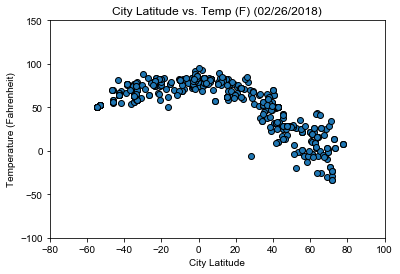

In [50]:
plt.scatter(x=weather_df["Latitude"], 
            y=weather_df["Temperature (Fahrenheit)"],
            edgecolors = "black",
            marker = "o",
            linewidth = 1.0)         
plt.title("City Latitude vs. Temp (F) (02/26/2018)")
plt.xlabel('City Latitude',fontsize=10)
plt.ylabel('Temperature (Fahrenheit)',fontsize=10)
plt.xlim(-80,100)
plt.ylim(-100,150)        
sea.set()

plt.savefig("TemperatureInWorldCities3.png")

plt.show

<function matplotlib.pyplot.show>

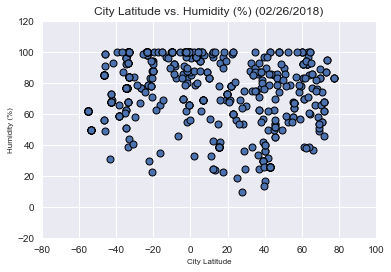

In [51]:
plt.scatter(x=weather_df["Latitude"], 
            y=weather_df["humidity"],
            edgecolors = "black",
            marker = "o",
            linewidth = 1.0)         
plt.title("City Latitude vs. Humidity (%) (02/26/2018)")
plt.xlabel('City Latitude',fontsize=8)
plt.ylabel('Humidity (%)',fontsize=8)
plt.xlim(-80,100)
plt.ylim(-20,120)
sea.set()
plt.savefig("HumidityWorldCities1.png")

plt.show

<function matplotlib.pyplot.show>

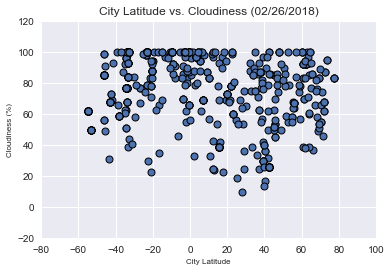

In [52]:
plt.scatter(x=weather_df["Latitude"], 
            y=weather_df["humidity"],
            edgecolors = "black",
            marker = "o",
            linewidth = 1.0)          
plt.title("City Latitude vs. Cloudiness (02/26/2018)")
plt.xlabel('City Latitude',fontsize=8)
plt.ylabel('Cloudiness (%)',fontsize=8)
plt.xlim(-80,100)
plt.ylim(-20,120)
sea.set()
plt.savefig("CloudsWorldCities1.png")

plt.show

<function matplotlib.pyplot.show>

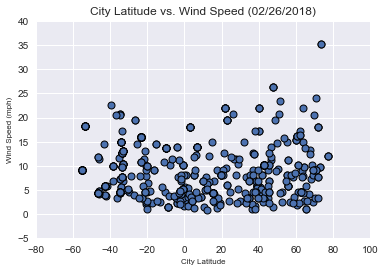

In [53]:
plt.scatter(x=weather_df["Latitude"], 
            y=weather_df["wind speed"],
            edgecolors = "black",
            marker = "o",
            linewidth = 1.0)   
plt.title("City Latitude vs. Wind Speed (02/26/2018)")
plt.xlabel('City Latitude',fontsize=8)
plt.ylabel('Wind Speed (mph)',fontsize=8)
plt.xlim(-80,100)
plt.ylim(-5,40)
sea.set()
plt.savefig("WindSpeedWorldCities1.png")

plt.show